# Домашнее задание по ML №2

## Предобработка

> **Задание**: Проведите предобработку текстов: если считаете нужным, выполните токенизацию, приведение к нижнему регистру, лемматизацию и/или стемминг. 
Ответьте на следующие вопросы:
1. Есть ли корреляция между средней длинной текста за день и DJIA?
2. Есть ли корреляция между количеством упоминаний Барака Обамы и США в день и DJIA? Учтите разные варианты написания США.
3. Каких статей больше: статей о России и Путине или об Исламском государстве (запрещенной законом РФ террористическая организации)?
4. О каких кризисах (crisis) пишут статьи?


Импортируем библиотеки. Для успешной работы с данными должны быть установлены следующие библиотеки:
* numpy
* pandas
* sklearn
* matplotlib
* nltk

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Загружаем данные, смотрим на них:

In [3]:
df_news = pd.read_csv('Combined_News_DJIA.csv')

In [3]:
df_news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

Теперь положим все топики в один столбец для удобства.

In [4]:
# функункция для избавления от b"..." в данных (оказавшихся там из-за неправильного сохранения?)
def beautify_string(s):
    return s[2:-1] if type(s) is not float else ''
    
# функция для объединения данных столбцов с топиками в один столбец
def merge_topics(sli):
    return ' '.join([beautify_string(s) for s in sli])

merge_topics(df_news.iloc[2, 2:27]) # смёрдженные топики второго столбца

'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too. Russia \'ends Georgia operation\' "If we had no sexual harassment we would have no children..." Al-Qa\'eda is losing support in Iraq because of a brutal crackdown on activities it regards as un-Islamic - including women buying cucumbers Ceasefire in Georgia: Putin Outmaneuvers the West Why Microsoft and Intel tried to kill the XO $100 laptop Stratfor: The Russo-Georgian War and the Balance of Power    I\'m Trying to Get a Sense of This Whole Georgia-Russia War: Vote Up If You Think Georgia Started It, Or Down If you Think Russia Did The US military was surprised by the timing and swiftness of the Russian military\'s move into South Ossetia and is still trying to sort out what happened, a US defense official said Monday U.S. Beats War Drum as Iran Dumps the Dollar Gorbachev: "Georgian military attacked the South Ossetian capital of Tskhinvali with multiple rocket launchers designed to devastate la

In [5]:
# итерируем строки датафрейма и склеиваем содержание нужных столбцов, запиываем результат в новый стоблец
df_news['topics'] = [merge_topics(df_news.iloc[row, 2:27]) for row in df_news.index]

In [6]:
df_news.topics[1]

'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq? Bush puts foot down on Georgian conflict Jewish Georgian minister: Thanks to Israeli training, we\'re fending off Russia  Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired Olympic opening ceremony fireworks \'faked\' What were the Mossad with fraudulent New Zealand Passports doing in Iraq? Russia angered by Israeli military sale to Georgia An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people Welcome To World War IV! Now In High Definition! Georgia\'s move, a mistake of monumental proportions  Russia presses deeper into Georgia; U.S. says regime change is goal Abhinav Bindra wins first ever Individual Olympic Gold Medal for India  U.S. ship heads for Arctic to define territory Drivers in a Jerusalem taxi station threaten to quit rather than work for their new boss - an Arab The French Team is

Сейчас мы сделаем пробную предобработку текстов, чтобы продемонстрировать пример предобработки и ответить на вопросы из задания.

Стоп-слова:

In [7]:
from nltk.corpus import stopwords
stopset = stopwords.words('english')
stopset[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

Пунктуация:

In [8]:
from string import punctuation
punct = list(punctuation)
punct[:15]

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/']

Токенизатор:

In [9]:
from nltk.tokenize import word_tokenize
word_tokenize('BREAKING: Musharraf to be impeached')

['BREAKING', ':', 'Musharraf', 'to', 'be', 'impeached']

Мы не будем лемматизировать заголовки новостей, потому что <s>этот лемматизатор в nltk как мёртвому припарка</s> <s>чувак-победитель на kaggle ничего не лемматизировал</s> информация о словоизменении может оказаться полезной.

Теперь определим общую функцию для предобработки:

In [10]:
def default_preprocessor(text):
    text = word_tokenize(text.lower()) # приводим к нижнему регистру и токенизируем
    return [w for w in text if w not in stopset + punct] # убираем стоп-слова и пунктуацию

In [11]:
default_preprocessor('BREAKING: Musharraf to be impeached')

['breaking', 'musharraf', 'impeached']

In [127]:
df_news.topics.map(default_preprocessor)[:5:]

0    [georgia, 'downs, two, russian, warplanes, cou...
1    [wont, america, nato, help, us, wont, help, us...
2    [remember, adorable, 9-year-old, sang, opening...
3    [u.s., refuses, israel, weapons, attack, iran,...
4    [experts, admit, legalise, drugs, war, south, ...
Name: topics, dtype: object

**А что если оставить стоп-слова?**

In [14]:
def stopwords_preprocessor(text):
    text = word_tokenize(text.lower()) # приводим к нижнему регистру и токенизируем
    return [w for w in text if w not in punct] # убираем пунктуацию, оставляем стоп-слова

In [15]:
stopwords_preprocessor('BREAKING: Musharraf to be impeached')

['breaking', 'musharraf', 'to', 'be', 'impeached']

In [120]:
df_news.topics.map(stopwords_preprocessor)[:5:]

0    [georgia, 'downs, two, russian, warplanes, as,...
1    [why, wont, america, and, nato, help, us, if, ...
2    [remember, that, adorable, 9-year-old, who, sa...
3    [u.s., refuses, israel, weapons, to, attack, i...
4    [all, the, experts, admit, that, we, should, l...
Name: topics, dtype: object

**Оставим только пунктуацию**

In [18]:
def punct_preprocessor(text):
    text = word_tokenize(text.lower()) # приводим к нижнему регистру и токенизируем
    return [w for w in text if w not in stopset] # убираем стоп-слова, оставляем пунктуацию

In [19]:
punct_preprocessor('BREAKING: Musharraf to be impeached')

['breaking', ':', 'musharraf', 'impeached']

In [121]:
df_news.topics.map(punct_preprocessor)[:5:]

0    [georgia, 'downs, two, russian, warplanes, ', ...
1    [wont, america, nato, help, us, ?, wont, help,...
2    [remember, adorable, 9-year-old, sang, opening...
3    [u.s., refuses, israel, weapons, attack, iran,...
4    [experts, admit, legalise, drugs, war, south, ...
Name: topics, dtype: object

**оставим только различие регистров**

In [22]:
def lower_preprocessor(text):
    text = word_tokenize(text) # токенизируем и НЕ приводим к нижнему регистру 
    return [w for w in text if w not in stopset + punct] # убираем стоп-слова и пунктуацию

In [23]:
lower_preprocessor('BREAKING: Musharraf to be impeached')

['BREAKING', 'Musharraf', 'impeached']

In [122]:
df_news.topics.map(lower_preprocessor)[:5:]

0    [Georgia, 'downs, two, Russian, warplanes, cou...
1    [Why, wont, America, Nato, help, us, If, wont,...
2    [Remember, adorable, 9-year-old, sang, opening...
3    [U.S., refuses, Israel, weapons, attack, Iran,...
4    [All, experts, admit, legalise, drugs, War, So...
Name: topics, dtype: object

**Оставим знаки препинания + стопслова**

In [26]:
def stop_punct_preprocessor(text):
    text = word_tokenize(text.lower()) # приводим к нижнему регистру и токенизируем
    return text

In [27]:
stop_punct_preprocessor('BREAKING: Musharraf to be impeached')

['breaking', ':', 'musharraf', 'to', 'be', 'impeached']

In [123]:
df_news.topics.map(stop_punct_preprocessor)[:5:]

0    [georgia, 'downs, two, russian, warplanes, ', ...
1    [why, wont, america, and, nato, help, us, ?, i...
2    [remember, that, adorable, 9-year-old, who, sa...
3    [u.s., refuses, israel, weapons, to, attack, i...
4    [all, the, experts, admit, that, we, should, l...
Name: topics, dtype: object

**Оставим стоп-слова + регистр**

In [30]:
def stop_lower_preprocessor(text):
    text = word_tokenize(text) # токенизируем
    return [w for w in text if w not in punct] # убираем пунктуацию

In [31]:
stop_lower_preprocessor('BREAKING: Musharraf to be impeached')

['BREAKING', 'Musharraf', 'to', 'be', 'impeached']

In [124]:
df_news.topics.map(stop_lower_preprocessor)[:5:]

0    [Georgia, 'downs, two, Russian, warplanes, as,...
1    [Why, wont, America, and, Nato, help, us, If, ...
2    [Remember, that, adorable, 9-year-old, who, sa...
3    [U.S., refuses, Israel, weapons, to, attack, I...
4    [All, the, experts, admit, that, we, should, l...
Name: topics, dtype: object

**Оставим знаки препинания + регистр**

In [34]:
def punct_lower_preprocessor(text):
    text = word_tokenize(text) # токенизируем
    return [w for w in text if w not in stopset] # убираем стоп-слова

In [35]:
punct_lower_preprocessor('BREAKING: Musharraf to be impeached')

['BREAKING', ':', 'Musharraf', 'impeached']

In [125]:
 наше второеdf_news.topics.map(punct_lower_preprocessor)[:5:]

0    [Georgia, 'downs, two, Russian, warplanes, ', ...
1    [Why, wont, America, Nato, help, us, ?, If, wo...
2    [Remember, adorable, 9-year-old, sang, opening...
3    [U.S., refuses, Israel, weapons, attack, Iran,...
4    [All, experts, admit, legalise, drugs, War, So...
Name: topics, dtype: object

**Только токенизируем!**

In [38]:
word_tokenize('BREAKING: Musharraf to be impeached')

['BREAKING', ':', 'Musharraf', 'to', 'be', 'impeached']

In [126]:
df_news.topics.map(word_tokenize)[:5:]

0    [Georgia, 'downs, two, Russian, warplanes, ', ...
1    [Why, wont, America, and, Nato, help, us, ?, I...
2    [Remember, that, adorable, 9-year-old, who, sa...
3    [U.S., refuses, Israel, weapons, to, attack, I...
4    [All, the, experts, admit, that, we, should, l...
Name: topics, dtype: object

### Исследование данных

#### 1. Есть ли корреляция между средней длинной текста за день и DJIA?

мы воспользовались функцией, которая считает коэффициент корреляции Пирсона в модуле numpy https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html

In [41]:
# функция для объединения данных столбцов с топиками в один массив
def merge_topics_2arr(sli):
    arr = [beautify_string(s) for s in sli]
    return(arr)

# итерируем строки датафрейма и склеиваем содержание нужных столбцов, запиываем результат в новый стоблец
df_news['topics_list'] = [merge_topics_2arr(df_news.iloc[row, 2:27]) for row in df_news.index]

In [42]:
# посчитали среднюю длину текста за день
res = []
for topics in df_news['topics_list']:
    arr = [len(topic) for topic in topics]
    res.append(sum(arr)/len(arr))

In [43]:
# добавили в датафрейм новый столбец
df_news['av_len'] = res

In [44]:
# теперь посчитаем коэффициент корреляции Пирсона
# 1 способ
np.corrcoef(df_news['Label'], df_news['av_len'])[0,1]

-0.0027900870985365146

In [45]:
# 2 способ
from scipy.stats import pearsonr
x = df_news['Label']
y = df_news['av_len']
corr, p_value = pearsonr(x, y)

print('corr =', corr, 'p_value =', p_value )

corr = -0.00279008709854 p_value = 0.901034281785


Коэффициент корреляции Пирсона – это мера скоррелированности двух переменных. Он принимает значения от 1 до –1, где 1 означает, что корреляция между переменными идеальна, 0 – что корреляции нет, а –1, что имеется идеальная обратная корреляция.

В нашем случае результат близок к нулю, так что можно сказать, что корреляции между средней длинной текста за день и DJIA не наблюдается.

#### 2. Есть ли корреляция между количеством упоминаний Барака Обамы и США в день и DJIA? Учтите разные варианты написания США.

Будем считать, что одно+ упоминание имени барака обамы и/или сша в топике = одно упоминание в день

In [46]:
America = ['United States of America', 'America', 'US', 'USA', 'U.S.', 'Barack', 'Obama']

In [47]:
# подсчитаем, в скольких топиках за день упоминается америка или барак обама
def is_x(arr):
    is_x = []
    for topics in df_news['topics_list']:
        n = 0
        for topic in topics:
            i = 0
            for word in arr:
                if word in topic:
                    i += 1
            if i>0:
                n += 1
        is_x.append(n)
    return(is_x)

In [48]:
df_news['is_america'] = is_x(America)

In [49]:
# теперь посчитаем коэффициент корреляции Пирсона
# 1 способ
np.corrcoef(df_news['is_america'], df_news['Label'])[0,1]

-3.1548429719110349e-05

In [50]:
# 2 способ
from scipy.stats import pearsonr
x = df_news['Label']
y = df_news['is_america']
corr, p_value = pearsonr(x, y)

print('corr =', corr, 'p_value =', p_value )

corr = -3.15484297191e-05 p_value = 0.998878079838


коэффициент корреляции приблизительно равен -0.00003154842. Т.е. он тоже стремится к нулю, что значит, что корреляции нет.

#### 3. Каких статей больше: статей о России и Путине или об Исламском государстве (запрещенной законом РФ террористическая организации)?

In [51]:
Russia = ['Russian Federation', 'Russia', 'RF', 'Putin']
ISIL = ['Islamic State', 'ISIL', 'ISIS', 'IS', 'Daesh']

In [52]:
df_news['is_russia'] = is_x(Russia)
df_news['is_isil'] = is_x(ISIL)

In [53]:
print('russia =', sum(df_news['is_russia']), 'ISIL =', sum(df_news['is_isil']))

russia = 2054 ISIL = 1017


Про Россию и Путина статей больше.

#### 4. О каких кризисах (crisis) пишут статьи?

In [54]:
def crisis_preprocessor(text):
    text = word_tokenize(text.lower()) # приводим к нижнему регистру и токенизируем
    arr = [w for w in text if w not in stopset + punct] # убираем стоп-слова и пунктуацию
    return ' '.join(arr) # склеиваем вс1 в строку

In [55]:
crisis_preprocessor('BREAKING: Musharraf to be impeached')

'breaking musharraf impeached'

In [56]:
import re
crs = []
for topics in df_news['topics_list']:
    for topic in topics:
        topic = crisis_preprocessor(topic)
        if 'crisis' in topic:
            cr = re.findall('[a-zA-Z]+ crisis', topic)
            for i in cr:
                crs.append(i)

In [57]:
print(len(crs), len(set(crs)))

449 189


In [58]:
d = {}
for cr in crs:
    if cr not in d:
        d[cr] = 1
    else:
        d[cr] += 1

In [59]:
for slovo in sorted(d, key = d.get, reverse = True):
    print(slovo + ' - ' + str(d[slovo]))

financial crisis - 48
economic crisis - 25
debt crisis - 21
food crisis - 17
raine crisis - 14
ukraine crisis - 12
nuclear crisis - 12
political crisis - 9
euro crisis - 9
humanitarian crisis - 9
refugee crisis - 9
banking crisis - 7
s crisis - 7
ria crisis - 7
migrant crisis - 6
grant crisis - 4
fugee crisis - 4
eurozone crisis - 4
water crisis - 4
health crisis - 4
global crisis - 4
za crisis - 4
currency crisis - 3
cholera crisis - 3
aq crisis - 3
climate crisis - 3
greek crisis - 3
reached crisis - 3
syria crisis - 3
bank crisis - 3
energy crisis - 3
korea crisis - 3
eek crisis - 3
fa crisis - 2
current crisis - 2
oil crisis - 2
diplomatic crisis - 2
thai crisis - 2
warns crisis - 2
men crisis - 2
response crisis - 2
rape crisis - 2
pan crisis - 2
lanka crisis - 2
housing crisis - 2
crimea crisis - 2
ola crisis - 2
hostage crisis - 2
gration crisis - 2
ebola crisis - 2
iraq crisis - 2
grants crisis - 2
iceland crisis - 2
fundamental crisis - 1
deficit crisis - 1
pollution crisis - 

Как видно из представленного частотного списка, самые обсуждаемые -- это financial crisis и economic crisis

## Обучение классификаторов

> **Задание**: Вам предстоит решить следующую задачу: по текстам новостей за день определить, вырастет или понизится DJIA. То есть, метки класса (y) заданы DJIA, признаки (X) требуется извлечь из текстов.

> Обучающее и тестовое множество строится так: данные до начала 2015 года используются для обучения, данные с 2015 года и позже – для тестирования.

> Используйте любой известный вам алгоритм классификации текстов для того,  Используйте $tf-idf$ преобразование, сингулярное разложение, нормировку признакого пространства и любые другие техники обработки данных, которые вы считаете нужным. Используйте accuracy и F-measure  для оценки качества классификации. Покажите, как  $tf-idf$ преобразование или сингулярное разложение или любая другая использованная вами техника влияет на качество классификации. 

> Если у выбранного вами алгоритма есть гиперпараметры (например, alpha в преобразовании Лапласа для метода наивного Байеса), покажите, как изменение гиперпараметра влияет на качество классификации. 

Разделяем выборку на train и test, как сказано в задании:

In [12]:
train = df_news[df_news['Date'] < '2015-01-01']
test = df_news[df_news['Date'] > '2014-12-31']

In [13]:
print(train.iloc[0]['Date'] + ', ' + train.iloc[-1]['Date'])

2008-08-08, 2014-12-31


In [62]:
print(test.iloc[0]['Date'], test.iloc[-1]['Date'])

2015-01-02 2016-07-01


Попробуем сначала деревья решений, CountVectorizer и наш дефолтный препроцессинг:

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [64]:
ppl = Pipeline(
    [('vect', CountVectorizer(tokenizer=default_preprocessor)),
    ('tree', DecisionTreeClassifier(random_state=42))]
)
ppl.fit(train.topics, y=train.Label)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))])

In [65]:
print(classification_report(test.Label, ppl.predict(test.topics)))
print(accuracy_score(test.Label, ppl.predict(test.topics)))

             precision    recall  f1-score   support

          0       0.52      0.48      0.50       186
          1       0.53      0.57      0.55       192

avg / total       0.53      0.53      0.53       378

0.526455026455


Как мы видим, дефолтный вариант работает очень плохо: результаты практически не отличаются от подбрасывания монетки.

Попробуем немного поиграться с параметрами: зададим минимальную/максимальную частоту документа, другой ngram_range, максимальное количество листьев...

In [14]:
ppl = Pipeline(
    [('vect', CountVectorizer(tokenizer=default_preprocessor, min_df=5)),
    ('tree', DecisionTreeClassifier(random_state=42))]
)
ppl.fit(train.topics, y=train.Label)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...plit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))])

In [15]:
print(classification_report(test.Label, ppl.predict(test.topics)))
print(accuracy_score(test.Label, ppl.predict(test.topics)))

             precision    recall  f1-score   support

          0       0.54      0.47      0.51       186
          1       0.55      0.61      0.58       192

avg / total       0.54      0.54      0.54       378

0.544973544974


Уже немного лучше! Немного поэксперементировав, поняли, что оптимальная минимальная частота — 5, а вот максимальную лучше не трогать. Попытки подобрать максимальное количество листьев и оптимальный разброс нграммов успехом не увенчались.

А теперь попробуем использовать TfidfVectorizer вместо CountVectorizer.

In [68]:
ppl = Pipeline(
    [('vect', TfidfVectorizer(tokenizer=default_preprocessor)),
    ('tree', DecisionTreeClassifier(random_state=45))]
)
ppl.fit(train.topics, y=train.Label)
print(classification_report(test.Label, ppl.predict(test.topics)))
print(accuracy_score(test.Label, ppl.predict(test.topics)))

             precision    recall  f1-score   support

          0       0.47      0.45      0.46       186
          1       0.49      0.51      0.50       192

avg / total       0.48      0.48      0.48       378

0.478835978836


Ура, $tf-idf$ преобразование делает вещи хуже! (Проверено на random_state от 35 до 45 и с разными значениями min_df и max_df, вверху — лучший результат, которого получилось добиться).

Вернёмся к обычному CountVectorizer и теперь попробуем другой препроцессинг. Например, попробуем не убирать стоп-слова (а только пунктуацию).

In [69]:
ppl = Pipeline(
    [('vect', CountVectorizer(tokenizer=stopwords_preprocessor)),
    ('tree', DecisionTreeClassifier(random_state=42))]
)
ppl.fit(train.topics, y=train.Label)
print(classification_report(test.Label, ppl.predict(test.topics)))
print(accuracy_score(test.Label, ppl.predict(test.topics)))

             precision    recall  f1-score   support

          0       0.47      0.41      0.44       186
          1       0.49      0.55      0.52       192

avg / total       0.48      0.48      0.48       378

0.484126984127


Нет, лучше не становится. (Тоже проверено при разных параметрах).

А теперь попробуем использовать лемматизатор<s> и понять, почему не надо этого делать</s>:

In [70]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [71]:
wnl.lemmatize('added')

'added'

In [72]:
wnl.lemmatize('kittens')

'kitten'

In [73]:
wnl.lemmatize('longer')

'longer'

Как мы видим, лемматизируются только существительные, всё остальное не лемматизируется. Попробуем всё же применить этот лемматизатор в действии.

In [74]:
def lemm_preproc(text):
    text = wnl.lemmatize(text)
    return default_preprocessor(text)
lemm_preproc(train.topics[0][:50])

['georgia', "'downs", 'two', 'russian', 'warplanes', 'countries']

In [75]:
ppl = Pipeline(
    [('vect', CountVectorizer(tokenizer=lemm_preproc, min_df=5)),
    ('tree', DecisionTreeClassifier(random_state=42))]
)
ppl.fit(train.topics, y=train.Label)
print(classification_report(test.Label, ppl.predict(test.topics)))
print(accuracy_score(test.Label, ppl.predict(test.topics)))

             precision    recall  f1-score   support

          0       0.53      0.50      0.51       186
          1       0.54      0.56      0.55       192

avg / total       0.53      0.53      0.53       378

0.531746031746


Ожидаемо, результат особенно не изменился.

А что если вместо лемматизации с помощью WordNetLemmatizer воспользоваться стемматизацией с SnowballStemmer?

In [76]:
from nltk.stem.snowball import SnowballStemmer
s = SnowballStemmer("english")
s.stem('eating')

'eat'

In [77]:
def stem_preproc(text):
    text = word_tokenize(text.lower()) # приводим к нижнему регистру и токенизируем
    return [s.stem(w) for w in text if w not in stopset + punct] # - стоп-слова и пунктуация, + стемминг
stem_preproc(train.topics[0][:50])

['georgia', 'down', 'two', 'russian', 'warplan', 'countri']

Кажется, эта работает лучше! Применим её на практике.

In [78]:
for i in range(3, 9):
    ppl = Pipeline(
        [('vect', CountVectorizer(tokenizer=stem_preproc, min_df=i)),
        ('tree', DecisionTreeClassifier(random_state=42))]
    )
    ppl.fit(train.topics, y=train.Label)
    print(classification_report(test.Label, ppl.predict(test.topics)))
    print(accuracy_score(test.Label, ppl.predict(test.topics)))

             precision    recall  f1-score   support

          0       0.45      0.35      0.40       186
          1       0.48      0.57      0.52       192

avg / total       0.46      0.47      0.46       378

0.465608465608
             precision    recall  f1-score   support

          0       0.48      0.38      0.43       186
          1       0.50      0.60      0.55       192

avg / total       0.49      0.49      0.49       378

0.492063492063
             precision    recall  f1-score   support

          0       0.50      0.42      0.46       186
          1       0.51      0.59      0.55       192

avg / total       0.51      0.51      0.50       378

0.507936507937
             precision    recall  f1-score   support

          0       0.48      0.39      0.43       186
          1       0.50      0.59      0.54       192

avg / total       0.49      0.49      0.49       378

0.492063492063
             precision    recall  f1-score   support

          0       0.49    

Нет, тоже не помогло.

Попробуем теперь какую-нибудь другую модель, например, логистическую регрессию.

In [26]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
ppl = Pipeline(
    [('vect', CountVectorizer(tokenizer=default_preprocessor, min_df=5)),
    ('tree', LogisticRegression(random_state=42))]
)
ppl.fit(train.topics, y=train.Label)
print(classification_report(test.Label, ppl.predict(test.topics)))
print(accuracy_score(test.Label, ppl.predict(test.topics)))

             precision    recall  f1-score   support

          0       0.40      0.33      0.36       186
          1       0.44      0.52      0.48       192

avg / total       0.42      0.43      0.42       378

0.425925925926


**Получается, деревья решений лучше, чем логистическая регрессия.**

Потестим все функции препроцессинга (токенизации), которые описаны в пункте 1, с деревьями решений + CountVectorizer. 

In [111]:
ppl = Pipeline(
    [('vect', CountVectorizer(tokenizer=default_preprocessor, min_df=5)),
    ('tree', DecisionTreeClassifier(random_state=42))]
)
ppl.fit(train.topics, y=train.Label)
print(classification_report(test.Label, ppl.predict(test.topics)))
print(accuracy_score(test.Label, ppl.predict(test.topics)))

             precision    recall  f1-score   support

          0       0.54      0.47      0.51       186
          1       0.55      0.61      0.58       192

avg / total       0.54      0.54      0.54       378

0.544973544974


Перебрав все функции препроцессинга мы выяснили, что лучшей является дефолтная функция, которая убирает стоп-слова, знаки препинания и приводит всё к нижнему регистру (с одной оговоркой: разница в регистре не влияет на результат по сравнению с дефолтным токенизатором). 
Остальные функции препроцессинга делают результат только хуже.

А теперь попробуем применить сингулярное разложение (SVD) к лучшей получившейся модели.

In [29]:
from sklearn.decomposition import TruncatedSVD

In [30]:
for comp in range(80, 161, 20):
    ppl = Pipeline(
        [('vect', CountVectorizer(tokenizer=default_preprocessor, min_df=5)),
         ('svd', TruncatedSVD(n_components=comp)),
        ('tree', DecisionTreeClassifier(random_state=43))]
    )
    ppl.fit(train.topics, y=train.Label)
    print('components: {0}'.format(comp))
    print(classification_report(test.Label, ppl.predict(test.topics)))
    print(accuracy_score(test.Label, ppl.predict(test.topics)))

components: 80
             precision    recall  f1-score   support

          0       0.48      0.39      0.43       186
          1       0.50      0.59      0.54       192

avg / total       0.49      0.49      0.48       378

0.489417989418
components: 100
             precision    recall  f1-score   support

          0       0.48      0.42      0.45       186
          1       0.50      0.55      0.52       192

avg / total       0.49      0.49      0.48       378

0.486772486772
components: 120
             precision    recall  f1-score   support

          0       0.43      0.37      0.40       186
          1       0.47      0.53      0.50       192

avg / total       0.45      0.45      0.45       378

0.452380952381
components: 140
             precision    recall  f1-score   support

          0       0.46      0.39      0.42       186
          1       0.48      0.55      0.52       192

avg / total       0.47      0.47      0.47       378

0.473544973545
components: 160
 

Сингулярное разложение не помогло. Нарисуем на всякий случай график зависимости accuracy и f-меры от количества компонент.

In [32]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline

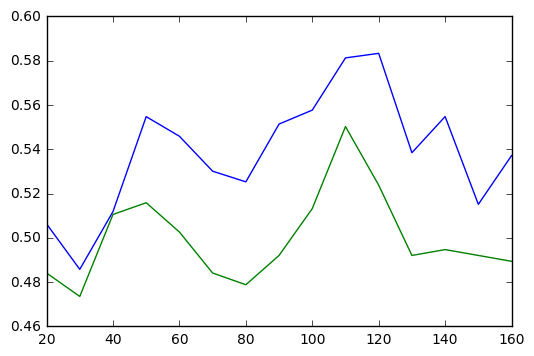

In [33]:
fs, acc = [], []
for comp in range(20, 161, 10):
    ppl = Pipeline(
        [('vect', CountVectorizer(tokenizer=default_preprocessor, min_df=5)),
         ('svd', TruncatedSVD(n_components=comp)),
        ('tree', DecisionTreeClassifier(random_state=43))]
    )
    ppl.fit(train.topics, y=train.Label)
    fs.append(f1_score(test.Label, ppl.predict(test.topics)))
    acc.append(accuracy_score(test.Label, ppl.predict(test.topics)))

plt.plot(list(range(20, 161, 10)), fs, label='F-score')
plt.plot(list(range(20, 161, 10)), acc, label='Accuracy')
plt.show()

Мы можем увидеть, что самым лучшим результат был при числе компонент, равным 110.

## Часть 3 [2 балла] Творческая
> Придумайте и попытайтесь сделать еще что-нибудь, чтобы улучшить качество классификации. Например:
* использовать в качестве признаков только именованные сущности;
* использовать в качестве признаков скрытые темы;
* добавить признак, отвечающий за какие-то важные темы или тональность новостей.

### Именнованые сущности

In [20]:
import re
def names_preprocessor(text):
    text = re.sub('^[A-Za-z]+ ', '', text) # убираем первое слово в предложении
    text = re.sub('\. [A-Za-z]+ ', '. ', text)
    res = re.findall('[A-Z][a-z]+', text)
    return [w for w in res if w.lower() not in stopset]

In [21]:
names_preprocessor('Lalala BREAKING: Musharraf to Be Rala impeached Nya. Lalal rara Cococo.')

['Musharraf', 'Rala', 'Nya', 'Cococo']

In [22]:
df_news.topics.map(names_preprocessor)[:5:]

0    [Russian, Musharraf, Today, Columns, South, Os...
1    [America, Nato, Iraq, Bush, Georgian, Jewish, ...
2    [Georgia, Al, Qa, Iraq, Islamic, Ceasefire, Ge...
3    [Israel, Iran, Tskhinvali, South, Ossetia, Isr...
4    [War, South, Osetia, Russian, Ara, Abrahamian,...
Name: topics, dtype: object

In [27]:
ppl = Pipeline(
    [('vect', CountVectorizer(tokenizer=names_preprocessor, lowercase=False)),
    ('tree', LogisticRegression(random_state=42))]
)
ppl.fit(train.topics, y=train.Label)
print(classification_report(test.Label, ppl.predict(test.topics)))
print(accuracy_score(test.Label, ppl.predict(test.topics)))

             precision    recall  f1-score   support

          0       0.45      0.34      0.39       186
          1       0.49      0.60      0.54       192

avg / total       0.47      0.47      0.46       378

0.473544973545


In [28]:
ppl = Pipeline(
    [('vect', CountVectorizer(tokenizer=names_preprocessor, lowercase=False)),
    ('tree', DecisionTreeClassifier(random_state=42))]
)
ppl.fit(train.topics, y=train.Label)
print(classification_report(test.Label, ppl.predict(test.topics)))
print(accuracy_score(test.Label, ppl.predict(test.topics)))

             precision    recall  f1-score   support

          0       0.45      0.41      0.43       186
          1       0.47      0.51      0.49       192

avg / total       0.46      0.46      0.46       378

0.460317460317


Несмотря на наши старания, результат лучше не стал.

## Вывод

Задача построить модель, предсказывающую индекс Доу-Джонса по заголовкам новостей, кажется нам довольно безнадёжной. При разных алгоритмах машинного обучения, разных способах предобработки и других разных параметрах мы всегда получали результат, очень близкий к 50%, то есть неотличимый от случайного. 